# Prosper Loan Data Investigation
## by Angel Newportright

## Investigation Overview
For this presentation, I focused on four key Insights;
1. The top 10 Listing Category by loan count and percentage. This is to examine the most common reasons for which borrowers use the Prosper platform
2. The employment category has the higest number of completed, defaulted and chargedoff loans. This is to reveal the employment category that completed more of their loan payment.
3. The relationship that exist betweeen the number of friends that invested in a loan and number of investors that are not friends. This is to examine the correlation significance a numerical variable has on another numerical veriable. 
4. Income Status Impact on Loan Repayment Completion.

## Dataset Overview

This dataset contains observations from the Prosper platform.  [**Prosper**](https://www.prosper.com/) is a **peer-to-peer lending platform** that provides personal loans to borrowers with fair or good credit. This data set contains 113,937 loans with 81 variables on each loan, including loan amount, borrower rate (or interest rate), current loan status, borrower income, and many others. Howerer, because we were not expected to explore all of the variables in the dataset we focused our investigation on 20 variables. Included is the data [**dictionary**](https://docs.google.com/spreadsheets/d/1gDyi_L4UvIrLTEC6Wri5nbaMmkGmLQBk-Yx3z0XDEtI/edit#gid=0). that explains the variables in the data set. Please see data dictionary for more information

In [1]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb
import datetime as dt

%matplotlib inline

# suppress warnings from final output
import warnings
warnings.simplefilter("ignore")

In [2]:
# load in the dataset into a pandas dataframe
loan_datar = pd.read_csv('clean_loan_data.csv')

## Top 10 Listing Category by Loan Count and Percentage
The first insight we want to obtain from our investigation is to know the top 10 reason why borrowers solicit for loan via the `Prosper platform`. 

From our investigation we oberserved that 
1. Most loans were taken for debt consolidation.
>What is Debt consolidation: This refers to the act of taking out a new loan to pay off other smaller liabilities and consumer debts
2. The Listing Category with the second hightest count of loan is `Not Available` category. What this means is that; a large number of applicants couldn't find the category which defines thier purpose of application. 
>To tackle this: The `Prosper`platform can provide option for new applicants to enter the reason for thier loan. 

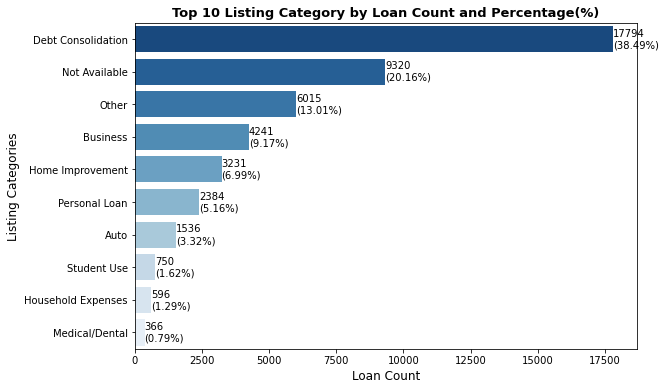

In [3]:
# Plotting the Count and Percentage(%) of loan by Listing Category

# Selecting our base color for plotting
base_color = sb.color_palette()[9]

# Getting the count of the categories in ListingCategory Column
list_count = loan_datar['ListingCategory'].value_counts().iloc[:10]

#Setting the size of the plot
plt.figure(figsize=[9,6])

# Making the plot
sb.countplot(data= loan_datar, y='ListingCategory', 
             order=list_count.iloc[:10].index,
             palette='Blues_r')
# Adding anotations to the plot
for i in range (list_count.shape[0]):
    # Remember, list_count contains the frequency of unique values in the `ListingCategory` column in decreasing order.
    count = list_count[i]
    # Convert count into string
    ct_string = '{:0.2f}'.format(100*(count/list_count.sum()))
    # Print the string value on the bar. 
    plt.text(count+1, i, (str(count)+'\n'+'('+ct_string+'%)'), va='center')
plt.xlabel('Loan Count', fontsize=12)
plt.ylabel('Listing Categories', fontsize=12)
plt.title('Top 10 Listing Category by Loan Count and Percentage(%)',  fontsize=13,fontweight='heavy');

## Average Loan Amount and Status Across Employment Categories
The second insight we want to obtain from our investigation is to know which employment category has the higest number of completed, defaulted and chargedoff loans as well as the average loan amount across the categories.

From the pointplot below we can see that 
1. We have more completed loans from borrowers under the 'Employed' category.
> The prosper platform can incentivise employed persons to use thier platform as they are more likely to complete their loan payment.
2. Borrowers that are Not Employed have the most chargedoff loans.
3. For all other categories except 'employed and not-employed', have more loans that are defaulted.

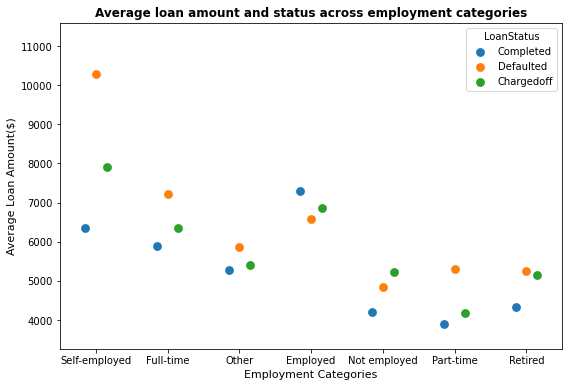

In [4]:
# Excluding 'cancelled' loans in listing category from our visualisation
locay = loan_datar[loan_datar['LoanStatus'] != 'Cancelled']

#Setting the size of the plot
plt.figure(figsize=[9,6])

# Plotting a point plot
ax = sb.pointplot(data = locay , x = 'EmploymentStatus', y = 'LoanOriginalAmount', hue = 'LoanStatus', 
                  dodge = 0.3, errwidth=False, linestyles = "")

plt.xlabel('Employment Categories', fontsize=11)
plt.ylabel('Average Loan Amount($)', fontsize=11)
plt.title('Average loan amount and status across employment categories' ,fontweight='bold', fontsize=12);

## Correlation Matrix of Prosper Loan Data

The third insight we want to obtain from our investigation is to know the degree of correlation that exist amongst the numerical variables of our dataset.

We discovered that
1. The the number of investors for a loan is mostly determined by the Loan Original Amount, then by the stated monthly income of the applicants. 
> From our visual below we can say that the larger a loan amount is, the higher the number of investors who would invest in the loan. However, the stated monthly income of an applicant has a degree of impresion on investors.

2. There is a strong corralation between the number of friends who invest in a loan and the number of recomendations a the borrower has. 
> This simply means that friends who invest in a loan are most likely to make a recomendation.

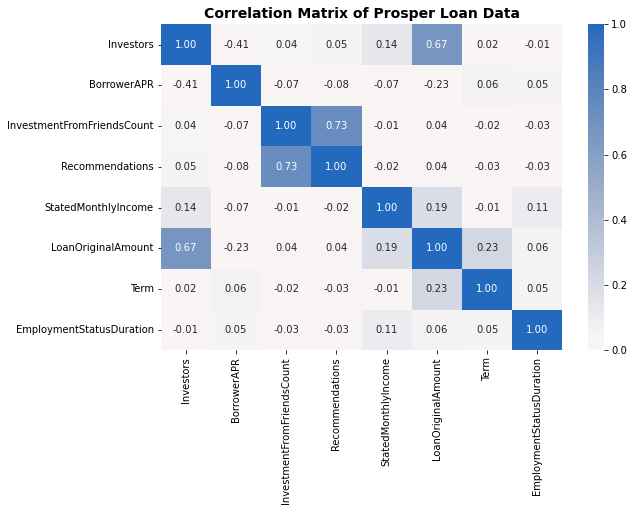

In [5]:
# Creating a dataframe containing Numerical variables
numerical_cols = [ 'Investors','BorrowerAPR','InvestmentFromFriendsCount', 'Recommendations','StatedMonthlyIncome', 'LoanOriginalAmount','Term','EmploymentStatusDuration']
loan_d = loan_datar[numerical_cols]

# Creating a table showing the correlation  significance amongst variables
cor_table = loan_d.corr()

#Setting the size of the plot
plt.figure(figsize=[9,6])

# Plotting the correlation matrix
sb.heatmap(cor_table, annot = True, fmt = '.2f', cmap = 'vlag_r', vmin=0 , center = 0)
plt.title('Correlation Matrix of Prosper Loan Data', fontweight='heavy', fontsize=14);

## Income Status Impact on Loan Repayment Completion 

The last insight we want obtain form our investigation is to know the which category of borrowers obtained more loans and which completed more of their loan payment.

From our plot we can see that 
1. Borrowers with verifiable income has more counts in terms of **total number of loan obtained** and **clompleted** loan repayments.
> This means that investors were more  willing to invest in loans whose borrower's income were verifiable and this category of borrowers completed more of their loan payments.
2. Borrowers with Income Not-Verifiable has relavely larger number of **charged off** loans.

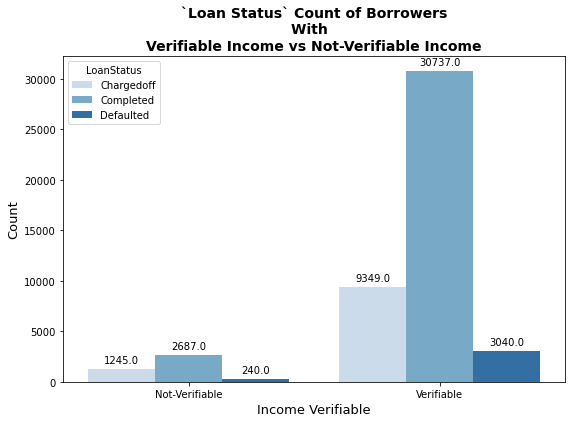

In [14]:
# excluding observation with canceled LoanSatatus as we have only 1 observation with canceled status
locav = loan_datar[loan_datar['LoanStatus'] != 'Cancelled']

# Grouping our variabbles for plotting
locav = locav.groupby(['IncomeVerifiable', 'LoanStatus'], as_index=False)['LoanNumber'].count()
locav.rename(columns = {'LoanNumber':'Total'}, inplace = True)
locav.reset_index(inplace=True)
locav = locav.drop('index', axis=1)

# Plotting a clustered barchart
plt.figure(figsize=[9,6])
splot = sb.barplot(data = locav, x='IncomeVerifiable', y='Total', hue='LoanStatus', palette='Blues');

# Adding annotation 
for p in splot.patches:
    splot.annotate(format(p.get_height()),
                   (p.get_x() + p.get_width() / 2., p.get_height()),
                   ha='center', va='center',
                   xytext=(0, 9),
                   textcoords='offset points')
plt.title('`Loan Status` Count of Borrowers\nWith  \nVerifiable Income vs Not-Verifiable Income', fontweight='bold', fontsize=14)
plt.ylabel('Count', fontsize=13);
plt.xlabel('Income Verifiable', fontsize=13);

# Thank You!

In [15]:
!jupyter nbconvert Part_II_slide_deck_template.ipynb --to slides --post serve --no-input --no-prompt

[NbConvertApp] Converting notebook Part_II_slide_deck_template.ipynb to slides
[NbConvertApp] Writing 751792 bytes to Part_II_slide_deck_template.slides.html
[NbConvertApp] Redirecting reveal.js requests to https://cdnjs.cloudflare.com/ajax/libs/reveal.js/3.5.0
Traceback (most recent call last):
  File "C:\Users\anaconda\Scripts\jupyter-nbconvert-script.py", line 10, in <module>
    sys.exit(main())
  File "C:\Users\anaconda\lib\site-packages\jupyter_core\application.py", line 264, in launch_instance
    return super(JupyterApp, cls).launch_instance(argv=argv, **kwargs)
  File "C:\Users\anaconda\lib\site-packages\traitlets\config\application.py", line 846, in launch_instance
    app.start()
  File "C:\Users\anaconda\lib\site-packages\nbconvert\nbconvertapp.py", line 369, in start
    self.convert_notebooks()
  File "C:\Users\anaconda\lib\site-packages\nbconvert\nbconvertapp.py", line 541, in convert_notebooks
    self.convert_single_notebook(notebook_filename)
  File "C:\Users\anaconda